## Evaluación Final Módulo 3

Fase 1: Exploración y Limpieza

1. Exploración Inicial:

    1.1.Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
    nulos, atípicos o datos faltantes en las columnas relevantes.

    1.2.Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
    presencia de valores nulos y estadísticas básicas de las columnas involucradas.

    1.3.Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:

    2.1.Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
    estén completos.

    2.2.Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
    presenten de forma coherente.

    2.3.Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
    datos) para garantizar la adecuación de los datos para el análisis estadístico.

1. Exploración Inicial:

    1.1 Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

### Importamos las librerías que necesitamos

In [2]:

# Tratamiento de datos

import pandas as pd
import numpy as np

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns

## Evaluar linealidad de las relaciones entre las variables y la distribución de las variables

#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerias para imputar nulos
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
## Exploración básica de los DATASET a través de la función:

def exploracion_df(data):
    print('------------------------------------------')
    print(data.head())
    print('------------------------------------------')
    print(data.columns)
    print('------------------------------------------')
    print(data.shape)

In [4]:
# lo primero que hacemos es cargar los dataframe usando el método "read_csv" de pandas para leer los archivos CSV.
# Guardamos como DataFrames en variables.

# 1º Dataframe

flight_activity = pd.read_csv("Customer Flight Activity (1).csv") 

# Nos muestra las 5 primeras filas de Dataframe
flight_activity.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
# Nos muestra las 5 últimas filas

flight_activity.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [6]:
# 2º Dataframe

loyalty_history = pd.read_csv("Customer Loyalty History (1).csv") 

# Nos muestra las 5 primeras filas de Dataframe
loyalty_history.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [7]:
# Nos muestra las 5 últimas filas

loyalty_history.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


1.2.Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

### Exploración Inicial

In [8]:
# El método "sample" nos muestra información de una fila al azar 
flight_activity.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
404993,966688,2018,12,0,0,0,0,0.0,0,0
308289,318786,2018,7,3,2,5,4490,449.0,0,0
385448,824668,2018,11,4,0,4,1012,101.0,0,0


In [9]:
# Observamos el nº filas/columnas del Dataframe
print(f'El número de filas de flight_activity es {flight_activity.shape[0]} y el número de columnas es {flight_activity.shape[1]}.')
print(f'El número de filas de loyalty_history es {loyalty_history.shape[0]} y el número de columnas es {loyalty_history.shape[1]}.')

El número de filas de flight_activity es 405624 y el número de columnas es 10.
El número de filas de loyalty_history es 16737 y el número de columnas es 16.


In [10]:
# 1º Dataframe de flight_activity
# Usamos el método info de pandas para ver el total de filas/columnas en el dataframe.
# Ver la cantidad de valores no nulos y el tipo de dato de cada columna.

print("Información del dataset:")

flight_activity.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


##### Observamos el conjunto de datos está limpio ya que las columnas no tiene valores nulos y todas las columnas son de tipo numérico.

In [11]:
# Nos ayuda a ver el tipo de Dataframe que es el 1º

flight_activity.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [12]:
# Recorremos cada columna de un DataFrame 
# Convertimos el nombre de la columna en minúsculas y eliminamos los puntos
nuevas_columnas_flight_activity = {columna:columna.lower().replace(' ', '_') for columna in flight_activity.columns}

# Usamos un diccionario con los nombres de columnas modificados para renombrar las columnas del DataFrame

flight_activity.rename(columns = nuevas_columnas_flight_activity, inplace = True)

# Comprobamos que el diccionario se haya creado correctamente.
nuevas_columnas_flight_activity

{'Loyalty Number': 'loyalty_number',
 'Year': 'year',
 'Month': 'month',
 'Flights Booked': 'flights_booked',
 'Flights with Companions': 'flights_with_companions',
 'Total Flights': 'total_flights',
 'Distance': 'distance',
 'Points Accumulated': 'points_accumulated',
 'Points Redeemed': 'points_redeemed',
 'Dollar Cost Points Redeemed': 'dollar_cost_points_redeemed'}

In [13]:
# El método "columns" nos devuelve el nombre de todas las columnas del DataFrame 
flight_activity.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [14]:
# Exploración inicial (del dataframe) de loyalty_history 
# Usamos el método info de pandas para ver el total de filas/columnas en el dataframe.
# La cantidad de valores no nulos y el tipo de dato por columna.

print("Exploración Inicial de 'Customer Loyalty History':\n")
print(loyalty_history.info())

Exploración Inicial de 'Customer Loyalty History':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  C

### Observamos que hay valores nulos y que algunas columnas presentan un tipo incorrecto.

In [15]:
loyalty_history.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [16]:
# Recorremos cada columna de un DataFrame 
# Convertimos el nombre de la columna en minúsculas y eliminamos los puntos 
nuevas_columnas_loyalty_history = {columna:columna.lower().replace(' ', '_') for columna in loyalty_history.columns}

# Usamos un diccionario con los nombres de columnas modificados para renombrar las columnas del DataFrame
loyalty_history.rename(columns = nuevas_columnas_loyalty_history, inplace = True)

# Comprobamos que el diccionario se haya creado correctamente.
nuevas_columnas_loyalty_history

{'Loyalty Number': 'loyalty_number',
 'Country': 'country',
 'Province': 'province',
 'City': 'city',
 'Postal Code': 'postal_code',
 'Gender': 'gender',
 'Education': 'education',
 'Salary': 'salary',
 'Marital Status': 'marital_status',
 'Loyalty Card': 'loyalty_card',
 'CLV': 'clv',
 'Enrollment Type': 'enrollment_type',
 'Enrollment Year': 'enrollment_year',
 'Enrollment Month': 'enrollment_month',
 'Cancellation Year': 'cancellation_year',
 'Cancellation Month': 'cancellation_month'}

In [17]:
loyalty_history.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [18]:
# El método describe calcula y muestra un resumen de las estadísticas descriptivas  de las variables numéricas del DataFrame
# La transposición "T" para una mejor presentación.

print("\nEstadísticas básicas de flight_data:")
flight_activity.describe().T # La 'T' cambia las filas y columnas


Estadísticas básicas de flight_data:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


#### Análisis general del conjunto de datos "activity":

* El loyalty_number va de 100018.0 a 999986.0 y hay un total de 405624.0 loyalty_number.
* Los años abarcan los años 2017 y 2018, con información de cada mes (de enero a diciembre).
* La mitad de ellos no ha reservado más de 1 vuelo ( flights_booked) en el periodo analizado, aunque algunos han llegado a reservar hasta el 21.
* El 75% de los usuarios no ha viajado con acompañantes, aunque algunos han llegado a viajar con hasta 11
La mitad de los usuarios no ha realizado más de 1 vuelo en total ( total_flights), aunque algunos han llegado a sumar hasta 32.
* La mitad de los vuelos corresponden a distancias menores a 488 unidades, aunque hay vuelos que alcanzan hasta 6293 unidades de distancia.
* La acumulación de puntos ( points_accumulated) tiende a ser baja. La mitad de los usuarios ha acumulado menos de 50 puntos, aunque algunos han llegado a acumular hasta 676,5.
* La redención de puntos ( points_redeemed) es poco frecuente. El 75% de los usuarios no ha redimido puntos, pese a que alguien ha llegado a redimir 876.
* La cantidad de dinero gastado por redención de puntos ( dollar_cost_points_redeemed) es igualmente baja. El 75% de los usuarios no ha gastado dinero redimiendo puntos, aunque en algunos casos se alcanzan hasta 71 dólares.

In [19]:
# En pandas te permite identificar y contar rápidamente los valores nulos (NaN) en un DataFrame.
flight_activity.isnull().sum() # calcula el total

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

In [20]:
# El método "duplicated()" identifica qué filas están duplicadas (devuelve una serie booleana).
# suma los valores booleanos (True = 1, False = 0), lo que equivale a contar las filas que fueron marcadas como duplicadas
flight_activity.duplicated().sum()

1864

In [21]:
# El método describe calcula y muestra un resumen de las estadísticas descriptivas  de las variables numéricas del DataFrame
# La transposición "T" para una mejor presentación.

print("\nEstadísticas básicas de flight_data:")
loyalty_history.describe().T # La 'T' cambia las filas y columnas


Estadísticas básicas de flight_data:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
clv,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
enrollment_year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
cancellation_year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [22]:
# Utilizaremos el método describe()del DataFrame para obtener estadísticas de las columnas categóricas.
# Esto se logra incluyendo el parámetro include = 'object'dentro de la función."
loyalty_history.describe(include = "object").T

,count,unique,top,freq
country,16737,1,Canada,16737
province,16737,11,Ontario,5404
city,16737,29,Toronto,3351
postal_code,16737,55,V6E 3D9,911
gender,16737,2,Female,8410
education,16737,5,Bachelor,10475
marital_status,16737,3,Married,9735
loyalty_card,16737,3,Star,7637
enrollment_type,16737,2,Standard,15766


In [23]:

# Eliminamos la columna "country", ya que todos sus valores son idénticos.
# Con el parámetro inplace = True para aplicar el cambio en el DataFrame original.
loyalty_history.drop(columns=['country'], inplace=True)

In [24]:
# Con el método "isna()" sabremos cuántos valores nulos tiene cada columna del DataFrame (.sum() calcula el total)
loyalty_history.isna().sum()
# Sumamos los nulos por columnas.

loyalty_number            0
province                  0
city                      0
postal_code               0
gender                    0
education                 0
salary                 4238
marital_status            0
loyalty_card              0
clv                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
dtype: int64

In [25]:
# El método "duplicated()" cuenta el total de filas duplicadas en el DataFrame
loyalty_history.duplicated().sum()

0

### Análisis general del conjunto de datos "historial":

* El número de fidelidad (loyalty_number) es único para cada cliente, variando entre 100018 y 999986, con un total de 16737 registros.
* Los salarios (salary) presentan datos faltantes, con valores que oscilan desde un mínimo negativo hasta un máximo de 407228.
* El valor de vida del cliente (clv) varía considerablemente, desde 1898.01 hasta 83325.38, con la mitad de los clientes teniendo un valor inferior a 5780.18.
* Las inscripciones se realizaron entre 2012 y 2018, con la mitad de los clientes inscritos en 2015 o antes. Los meses de inscripción (enrollment_month) abarcan todo el año, con el 50% de las inscripciones realizadas en julio o antes.
* El año de cancelación (cancellation_year) va de 2013 a 2018 y presenta valores nulos, lo que sugiere que algunos clientes aún están activos. De los que cancelaron, la mitad lo hicieron antes de 2017.
* Los meses de cancelación (cancellation_month) también cubren todo el año, con la mitad de las  cancelaciones realizadas en julio o antes. Los conteos de cancellation_yeary cancellation_monthson idénticos, confirmando que los valores corresponden a los clientes que sí cancelaron.

#### Los datos de tipos numéricos son coherentes con lo esperado, pero hay valores nulos en la columna salary

In [26]:
# Verificamos que no haya nulos en el 1º Data

print("\nValores nulos en flight_data:")
flight_activity.isnull().sum()/flight_activity.shape[0]


Valores nulos en flight_data:


loyalty_number                 0.0
year                           0.0
month                          0.0
flights_booked                 0.0
flights_with_companions        0.0
total_flights                  0.0
distance                       0.0
points_accumulated             0.0
points_redeemed                0.0
dollar_cost_points_redeemed    0.0
dtype: float64

In [27]:
# Verificamos que no haya nulos en el 2º Data

print("\nValores nulos en flight_data:")
loyalty_history.isnull().sum()/loyalty_history.shape[0]


Valores nulos en flight_data:


loyalty_number        0.000000
province              0.000000
city                  0.000000
postal_code           0.000000
gender                0.000000
education             0.000000
salary                0.253211
marital_status        0.000000
loyalty_card          0.000000
clv                   0.000000
enrollment_type       0.000000
enrollment_year       0.000000
enrollment_month      0.000000
cancellation_year     0.876501
cancellation_month    0.876501
dtype: float64

In [28]:
# Se hace un filtrado y observamos 20 valores negativos.
loyalty_history[loyalty_history.salary < 0].shape[0]

20

In [29]:
loyalty_history.salary.isnull().sum()

4238

###   1.3.Une los dos conjuntos de datos de la forma más eficiente.

In [30]:
# Como los DataFrames flight_activity y loyalty_history comparten la columna loyalty_number, la forma más eficiente de unirlos es mediante la función merge.
# Podemos hacerlo con "on":
# df_unido = flight_activity.merge(loyalty_history, on = "loyalty_number")
datos_combinados  = flight_activity.merge(loyalty_history, left_on = 'loyalty_number', right_on = 'loyalty_number')

datos_combinados.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


2. Limpieza de Datos:

    2.1.Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
    estén completos.

In [31]:
# Recorremos las columnas del DataFrame una por una, cambiando el formato de sus nombres
nombre_columnas = [columna.lower().replace(" ", "_") for columna in datos_combinados.columns]

datos_combinados.columns = nombre_columnas

datos_combinados.sample()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
222840,643225,2017,1,7,0,7,861,86.0,0,0,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Nova,7919.83,Standard,2016,2,NaN,NaN


In [32]:
# Con el método "info()" obtenemos información general del DataFrame que hemos unido
datos_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  province                     405624 non-null  object 
 11  city                         405624 non-null  object 
 12  postal_code                  405624 non-null  object 
 13 

In [33]:
# Utilizamos el método "shape" para saber cuántas filas y columnas tiene el DataFrame unido
datos_combinados.shape

(405624, 24)

In [34]:
# Identificaremos la cantidad de valores nulos y luego decidiremos cómo manejarlos

print("Las columnas que tienen nulos son")
datos_combinados.isnull().sum()

Las columnas que tienen nulos son


loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

In [35]:
# Mostrar un resumen estadístico de los datos unidos
datos_combinados.describe()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,302952.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503,79268.825953,7991.976226,2015.252529,6.668008,2016.499521,6.966443
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038,34992.133508,6863.663857,1.979427,3.399766,1.384336,3.448300
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [36]:
# Queremos ver si salario da negativo
datos_combinados["salary"].min()

-58486.0

In [37]:
# Contamos los salarios negativos
numero_salarios_negativos = datos_combinados[datos_combinados["salary"] < 0]["salary"].value_counts()

print("Total de salarios negativos:")
numero_salarios_negativos

Total de salarios negativos:


-19325.0    24
-46303.0    24
-49830.0    24
-46470.0    24
-49001.0    24
-9081.0     24
-12497.0    24
-10605.0    24
-26322.0    24
-17534.0    24
-46683.0    24
-19332.0    24
-58486.0    24
-47310.0    24
-45962.0    24
-43234.0    24
-39503.0    24
-57297.0    24
-31911.0    24
-34079.0    24
Name: salary, dtype: int64

### Luego, revisaremos los valores nulos y determinaremos si debemos imputarlos

In [38]:
# Filtramos utilizando shape para comprobar el total de valores negativos en la columna "salary"
print("El total de valores negativos en la columna salario es;")

loyalty_history[loyalty_history.salary < 0].shape[0] 

El total de valores negativos en la columna salario es;


20

In [39]:
# Estamos revisando cuántos salarios están en negativo y qué porcentaje representan, para entender mejor la situación
total_salarios = len(datos_combinados)
salarios_negativos = datos_combinados[datos_combinados['salary'] < 0]['salary'].count()
porcentaje_salarios_negativos = (salarios_negativos / total_salarios) * 100
porcentaje_salarios_negativos

print("Número total de salarios:", total_salarios)
print("Número de salarios negativos:", salarios_negativos)
print("Porcentaje de salarios negativos:", porcentaje_salarios_negativos, "%")

Número total de salarios: 405624
Número de salarios negativos: 480
Porcentaje de salarios negativos: 0.11833619312466717 %


In [40]:
# Corregimos los valores negativos, ya que ha debido de haber un error 
# abs = Columna a convertir a valores positivos

datos_combinados.salary = abs(datos_combinados.salary) 
datos_combinados["salary"].describe()

count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64

In [41]:
# Compruebo la columna "salary"" si es tipo float
datos_combinados['salary'].dtype

dtype('float64')

In [42]:
# Nuestro objetivo es no tener un resultado negativo
datos_combinados['salary'].min()

9081.0

In [43]:
# Contamos de nuevo el número total de duplicados del DataFrame unido
duplicados = datos_combinados.duplicated().sum()

print(f"El número total de duplicados es: {duplicados}")


El número total de duplicados es: 1864


In [44]:
# Eliminamos los valores duplicados en todo el DataFrame
datos_combinados.drop_duplicates(inplace=True)

In [45]:

duplicados = datos_combinados.duplicated().sum()
print(f"Duplicados encontrados: {duplicados}")

Duplicados encontrados: 0


In [46]:
datos_combinados.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [47]:
# Cambiamos el tipo de datos de las columnas seleccionadas al tipo 'object'
columnas_para_convertir = ['year', 'month', 'enrollment_year', 'enrollment_month']
datos_combinados[columnas_para_convertir] = datos_combinados[columnas_para_convertir].astype('object')
print(datos_combinados.dtypes)
print(datos_combinados.head())

loyalty_number                   int64
year                            object
month                           object
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                 object
enrollment_month                object
cancellation_year              float64
cancellation_month             float64
dtype: object
   loyalty_number  year month  flights_booked  fli

In [48]:
# Comprobamos que se han efectuado los cambios correctamente (a modo de ejemplo)
datos_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 405623
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  object 
 2   month                        403760 non-null  object 
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  province                     403760 non-null  object 
 11  city                         403760 non-null  object 
 12  postal_code                  403760 non-null  object 
 13 

In [49]:
# Calculamos la proporción de valores faltantes en las columnas escogidas
nulos = ["salary", "cancellation_year", "cancellation_month"]
nulos_porcentajes = (datos_combinados[nulos].isnull().sum() * 100) / len(datos_combinados)

nulos_porcentajes


salary                25.326927
cancellation_year     87.703091
cancellation_month    87.703091
dtype: float64

In [50]:
# Disponemos de 3 columnas con valores nulos
# Hacemos una copia del DataFrame usando el método "copy()"
df_copia = datos_combinados.copy()
df_copia.head(1)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [51]:
# Para las últimas tres columnas empezaremos por el IterativeImputer

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# Tranformamos los datos imputandos para los valores faltantes(datos incompletos)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["salary", "cancellation_year", "cancellation_month"]])

# Nos devuelve un array numérico
imputer_iterative_imputado

array([[9.25520000e+04, 2.01637653e+03, 6.76068566e+00],
       [9.25520000e+04, 2.01637653e+03, 6.76068566e+00],
       [9.25520000e+04, 2.01637653e+03, 6.76068566e+00],
       ...,
       [7.56160000e+04, 2.01700000e+03, 1.00000000e+00],
       [7.56160000e+04, 2.01700000e+03, 1.00000000e+00],
       [7.56160000e+04, 2.01700000e+03, 1.00000000e+00]])

In [52]:
# Creamos 3 columnas nuevas con este método
df_copia[["salary_iterative", "cancellation_year_iterative", "cancellation_month_iterative"]] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[['salary_iterative', 'cancellation_year_iterative', 'cancellation_month_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
salary_iterative                0
cancellation_year_iterative     0
cancellation_month_iterative    0
dtype: int64 nulos


In [53]:
# Usamos "describe()" para comparar las estadísticas antes y después de la inputación 
# El método que cause el menor cambio en las estadísticas será el elegido. 
df_copia.describe()[["salary","salary_iterative", "cancellation_year","cancellation_year_iterative", "cancellation_month","cancellation_month_iterative"]]

,salary,salary_iterative,cancellation_year,cancellation_year_iterative,cancellation_month,cancellation_month_iterative
count,301500.000000,403760.000000,49650.000000,403760.000000,49650.000000,403760.000000
mean,79371.732902,79309.622924,2016.504350,2016.500737,6.962095,6.956404
std,34726.433958,31044.430559,1.380482,0.551335,3.454362,1.280710
min,9081.000000,-1116.514680,2013.000000,2013.000000,1.000000,1.000000
25%,59262.000000,62836.000000,2016.000000,2016.444402,4.000000,6.870381
50%,73479.000000,79309.622923,2017.000000,2016.500737,7.000000,6.956404
75%,88606.000000,84015.000000,2018.000000,2016.675052,10.000000,7.219618
max,407228.000000,407228.000000,2018.000000,2018.000000,12.000000,12.000000


#### Analizamos los resultados:

* Podemos comprobar los datos originales junto con el imputado que no varia mucho la media y la mediana.

In [54]:
# Eliminamos columnas "Cancellation Year, Cancellation Month y Salary" 
# Nos quedamos con las imputadas sin nulos

df_copia.drop(["salary", "cancellation_year", "cancellation_month"], axis = 1, inplace = True)
df_copia.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary_iterative,cancellation_year_iterative,cancellation_month_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
2,100018,2018,10,6,4,10,3110,311.0,385,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686


In [55]:

# Cambiamos el nombre de las columnas obteniendo el mismo nombre de origen
cambio_nombre = {"salary_iterative": "salary",  'cancellation_year_iterative': "cancellation_year", "cancellation_month_iterative": "cancellation_month"   }
df_copia.rename(columns = cambio_nombre, inplace = True)

In [56]:
df_copia.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
2,100018,2018,10,6,4,10,3110,311.0,385,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
3,100018,2017,4,4,0,4,924,92.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686
4,100018,2017,5,0,0,0,0,0.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,92552.0,2016.376535,6.760686


In [57]:
## Comprobamos que no tiene ningun nulo
df_copia.isnull().sum()

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
salary                         0
cancellation_year              0
cancellation_month             0
dtype: int64

 2.2.Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
    presenten de forma coherente.

In [58]:
# Esto nos proporciona una muestra pequeña para inspeccionar visualmente si los datos parecen coherentes tras el proceso de limpieza de datos
df_copia.sample()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,salary,cancellation_year,cancellation_month
4273,110065,2017,2,0,0,0,0,0.0,0,0,British Columbia,Victoria,V10 6T5,Male,Bachelor,Single,Aurora,13432.0,2018 Promotion,2018,3,82365.0,2016.47208,6.911247


#### Nos proporciona:
 
* Obtener una visión general rápida de los datos tras el proceso de limpieza de datos
* Identificar valores atípicos 
* Verificar si la limpieza de datos ha sido efectiva

2.3.Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

###### Los cambios de tipo de datos lo hice anteriormente

In [59]:
# Guardar el DataFrame modificado en un nuevo CSV
df_copia.to_csv("df_copia.csv", index=False)

Fase 2: Visualización

    * Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:



2.1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

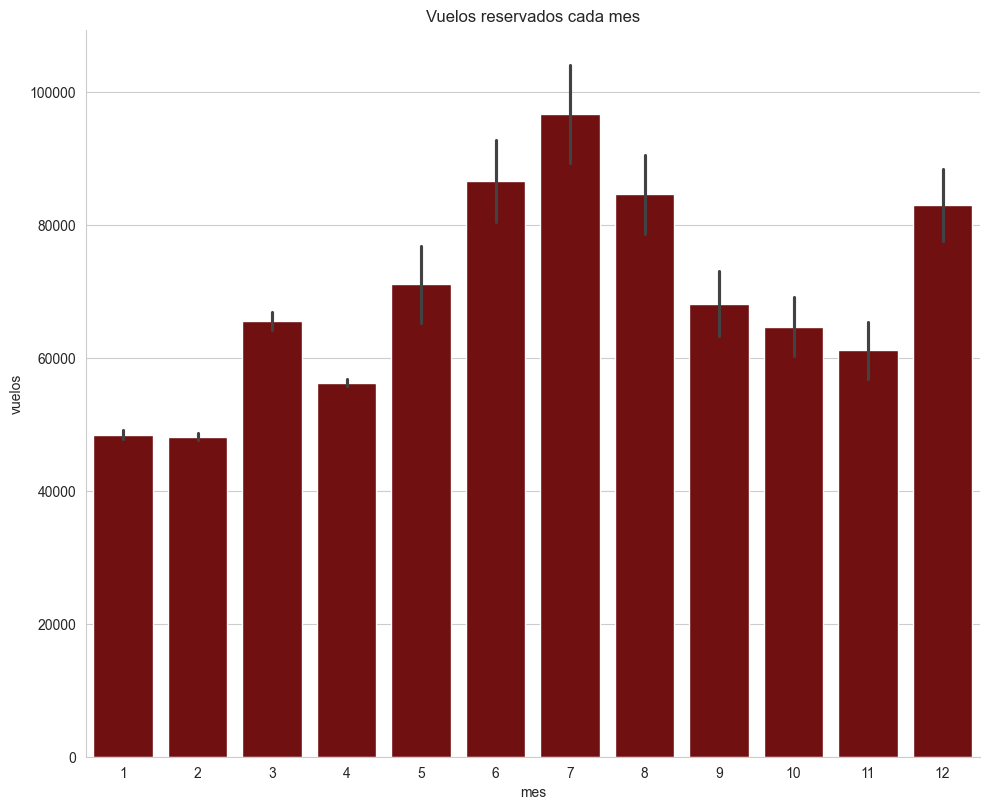

In [60]:

sns.set_style("whitegrid")

reservas_vuelos_mes_año = df_copia.groupby(['month', 'year'])['flights_booked'].sum().reset_index()
reservas_vuelos_mes_año


plt.figure(figsize=(10, 8))
sns.barplot(y='flights_booked',
            x='month',
            data=reservas_vuelos_mes_año,
            color= "maroon")

plt.tight_layout()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.xlabel("mes")
plt.ylabel("vuelos")
plt.title('Vuelos reservados cada mes')

plt.show()

Las reservas de viajes alcanzan su punto máximo en verano (especialmente julio) y en diciembre, debido a las vacaciones y a que la gente viaja más durante esos períodos.

2.2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

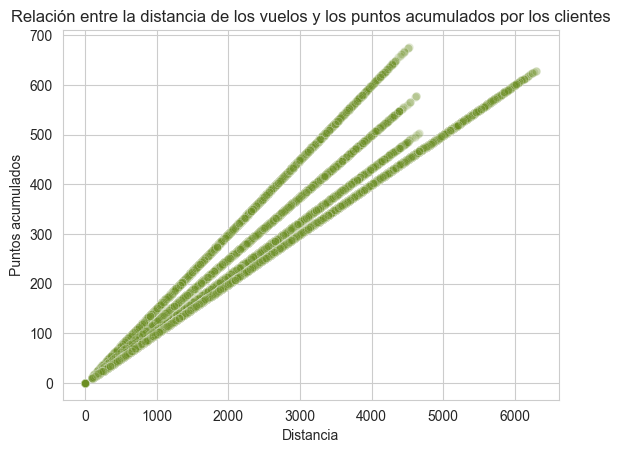

In [61]:
# Utilizamos la gráfica con un "scatterplot" para visualizar la relación entre dos variables numéricas
sns.scatterplot(x = "distance", 
                y = "points_accumulated", 
                data = df_copia,
                color = 'olivedrab',
                alpha = 0.2)

plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados por los clientes");


Se usó un gráfico del método matplotlib (scatter) para visualizar la relación entre la distancia recorrida (en km) y los puntos acumulados. Los puntos (maker) se muestran en color oliva y con transparencia (alpha es la tranparencia de los puntos). La gráfica sugiere una fuerte relación positiva: a mayor distancia de vuelo, mayor cantidad de puntos acumulados.

2.3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [62]:
# Agrupamos los datos por "province" y contamos cuántos clientes únicos hay en cada una.
df_clientes = df_copia.groupby("province")["loyalty_number"].count().reset_index()

df_clientes

,province,loyalty_number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


<Figure size 640x480 with 0 Axes>

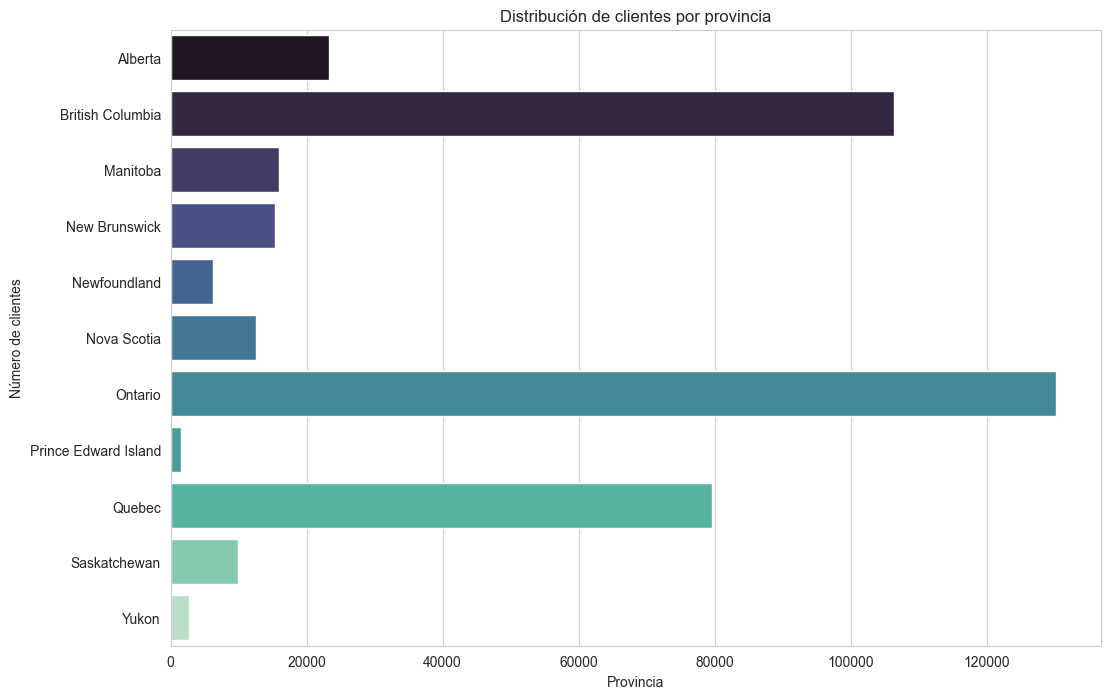

In [63]:
plt.tight_layout()

plt.figure(figsize=(12, 8))

sns.barplot(data = df_clientes, 
            x='loyalty_number',
            y='province',
            palette = 'mako')

plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')

plt.show()

Se crea un gráfico de barras usando la función barplot de Seaborn. Las provincias de Ontario, Columbia Británica y Quebec concentran el 60.6% de los clientes, lo cual es lógico dada su gran población y tamaño.

2.4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

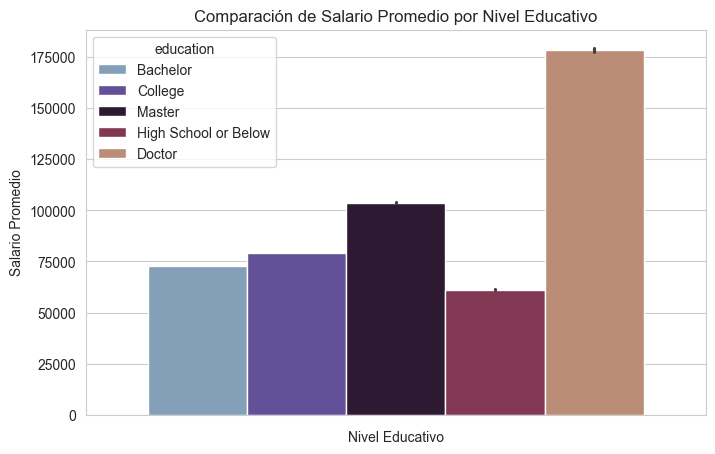

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(y='salary',hue='education', data=df_copia, palette='twilight')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación de Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45) 
plt.show()

La gráfica muestra que, en general, a mayor nivel educativo, mayor es el salario promedio. Los doctorados tienen el salario promedio más alto, pero también la mayor variación salarial. Los niveles educativos Master también presentan salarios promedio superiores a Bachelor y High School or below. El nivel 'College' no es relevante al no tener salario.

2.5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [65]:
df_copia["loyalty_card"].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [66]:
# Calculamos el porcentaje
porcentaje = df_copia.groupby("loyalty_card")["loyalty_number"].count().reset_index()
porcentaje

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


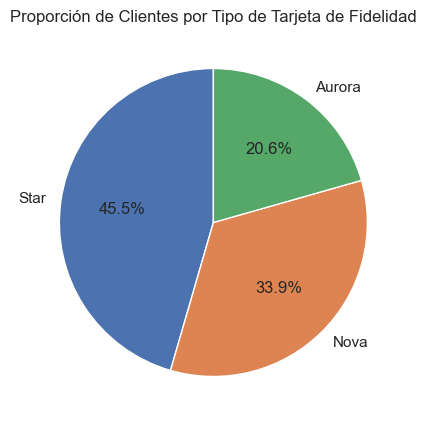

In [67]:
# Primero vemos qué variables se busca representar, en éste caso es categórica. 
# Además se nos pide las proporciones; pieplot
# Buscamos los valores en "Loyalty Card", si hay pocos se usarán como etiquetas en el gráfico.


loyalty_card_counts = df_copia['loyalty_card'].value_counts()


sns.set(style="whitegrid")
# Configuración del tamaño de la figura
plt.figure(figsize=(5, 5))
# Creamos el gráfico pieplot
plt.pie(loyalty_card_counts, labels= loyalty_card_counts.index , autopct='%1.1f%%', startangle=90)
# Añadir titulo
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
# Mostrar gráfica
plt.show()

Se usa el método matbplotlib (pieplot) para visualizar la distribución de clientes por tipo de tarjeta de lealtad (loyaltcard). La tarjeta "Star" es la más común (45.5%), seguida por "Nova" (33.9%) y finalmente "Aurora" (20.7%). Esto muestra que la tarjeta "Star" es la más popular y "Aurora" la menos.

2.6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [68]:
# Valores unicos 
df_copia["marital_status"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [69]:
# Valores unicos
df_copia["gender"].unique()

array(['Female', 'Male'], dtype=object)

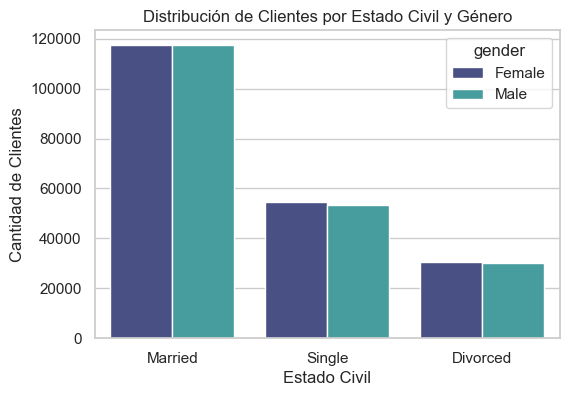

In [70]:
# Analizamos la distribución de clientes según su estado civil y género 
# para visualizar cómo se distribuyen estas variables categóricas entre sí.

plt.figure(figsize=(6, 4))
sns.countplot(x='marital_status', hue='gender', data=df_copia, palette='mako')

# Le damos nombre a la tabla y a los ejes
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.show()

Del método seaborn, se ha usado un countplot, para variable catégoricas, que es este caso e 'maritalstatus' el estado civil de los clientes, agregamos hue para garegar otra variable categoria, en este caso 'gender' y la paleta Paired. 

La mayoría de los clientes están casados, con una distribución de género equitativa. Hay más mujeres solteras y los divorciados son los menos representados.

Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

    3.1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:'Flights Booked' y 'Education'.

In [71]:
#dataframe de las dos columnas que nos piden
df_educacion = df_copia[['education','flights_booked']]
df_educacion

,education,flights_booked
0,Bachelor,3
1,Bachelor,2
2,Bachelor,6
3,Bachelor,4
4,Bachelor,0
...,...,...
405619,Bachelor,0
405620,Bachelor,0
405621,Bachelor,0
405622,Bachelor,0


3.2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada
grupo.

In [73]:
# Valores unicos de "education"
df_educacion["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [74]:
# Agrupamos los datos por la columna "education" 
# Calculamos la estadisticas descriptivas de fligth booked
columna_agrupada = df_educacion.groupby("education")["flights_booked"].describe()
columna_agrupada

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


3.3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.


Usamos ANOVA porque tenemos cinco grupos y queremos ver si sus promedios son diferentes de forma importante. A simple vista, los promedios parecen muy parecidos

<Axes: xlabel='education', ylabel='flights_booked'>

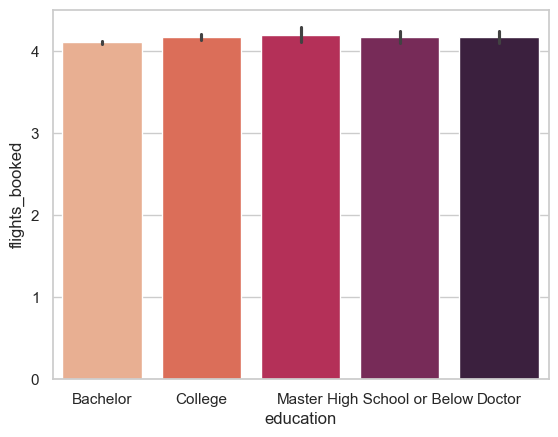

In [78]:
# analizamos los datos primero visualmente
sns.barplot(x='education', 
            y='flights_booked', 
            data=df_educacion,  
            palette = "rocket_r")

In [89]:
# Agrupar los datos por nivel educativo y crear un diccionario con los valores de vuelos reservados
datos_agrupados = {grupo: df_educacion[df_educacion['education'] == grupo]['flights_booked'].values 
                  for grupo in df_educacion}